# 1 - PROJECT OVERVIEW

The novel respiratory infection disease we are collectively battling emerged last year in China and although it is still unknown exactly where the outbreak first started, many early cases of COVID-19 have been attributed to people who have visited the Huanan Seafood Wholesale Market, located in Wuhan, Hubei, China.

The earliest known person with symptoms was later discovered to have fallen ill on 1 December 2019, and that person did not have visible connections with the later wet market cluster. Of the early cluster of cases reported that month, two thirds were found to have a link with the market.

At present, humanity continues to fight the global epidemic, weapons in the form of vaccines against the virus have been developed in various countries, and mass vaccination of the entire population of the planet is underway.

- The purpose of this work is to tell the story of how the struggle of the people with an mysterious virus that has claimed millions of human lives all over the world is going on.

- Perform Exploratory Data Analysis and provide meaningful insights.

- Build a Machine Learing Model to predict the new cases during the Second wave of Coronavirus.

- Build a Basic COVID-19 Dashboard to try and presesnt your work in an Interactive way.


## Importing required Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-data/owid-covid-data.csv
/kaggle/input/new-data-2/linear-comprehensive-covid-data (1).csv


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns # data visualization library

## Loading the Dataset

In [3]:
covid_data_path = "../input/new-data-2/linear-comprehensive-covid-data (1).csv"
df = pd.read_csv(covid_data_path)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


## Exploratory Data Analysis

In [4]:
df.columns #displays columns in the df

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [5]:
print("Shape of the Covid DataFrame:",df.shape,"\n")

Shape of the Covid DataFrame: (74866, 59) 



## **CREATING A NEW DATAFRAME FOR THE NEW ZEALAND DATA**

In [6]:
NZ_df = df.loc[df["location"] =="New Zealand"]
Ger_df = df.loc[df["location"] =="Germany"]
Slv_df = df.loc[df["location"] =="Slovakia"]


display(NZ_df.head())
NZ_df.shape

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
47766,NZL,Oceania,New Zealand,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
47767,NZL,Oceania,New Zealand,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
47768,NZL,Oceania,New Zealand,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
47769,NZL,Oceania,New Zealand,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
47770,NZL,Oceania,New Zealand,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931


(381, 59)

In [7]:
NZ_df = NZ_df.reset_index()  #RESETS THE INDEX OF THE DF
NZ_df.drop('index', axis=1, inplace=True)

Ger_df = Ger_df.reset_index()  #RESETS THE INDEX OF THE DF
Ger_df.drop('index', axis=1, inplace=True)

Slv_df = Slv_df.reset_index()  #RESETS THE INDEX OF THE DF
Slv_df.drop('index', axis=1, inplace=True)

In [8]:
NZ_df.head()  #display the data to see if the index is reset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,NZL,Oceania,New Zealand,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
1,NZL,Oceania,New Zealand,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
2,NZL,Oceania,New Zealand,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
3,NZL,Oceania,New Zealand,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931
4,NZL,Oceania,New Zealand,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.931


In [9]:
Ger_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,DEU,Europe,Germany,2020-01-27,1.0,1.0,NaN,NaN,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
1,DEU,Europe,Germany,2020-01-28,4.0,3.0,NaN,NaN,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
2,DEU,Europe,Germany,2020-01-29,4.0,0.0,NaN,NaN,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
3,DEU,Europe,Germany,2020-01-30,4.0,0.0,NaN,NaN,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947
4,DEU,Europe,Germany,2020-01-31,5.0,1.0,NaN,NaN,NaN,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947


In [10]:
NZ_df.info()  #info about the raw dataset
Ger_df.info()
Slv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               381 non-null    object 
 1   continent                              381 non-null    object 
 2   location                               381 non-null    object 
 3   date                                   381 non-null    object 
 4   total_cases                            381 non-null    float64
 5   new_cases                              381 non-null    float64
 6   new_cases_smoothed                     376 non-null    float64
 7   total_deaths                           351 non-null    float64
 8   new_deaths                             351 non-null    float64
 9   new_deaths_smoothed                    376 non-null    float64
 10  total_cases_per_million                381 non-null    float64
 11  new_ca

In [11]:
NZ_df.describe()    #describing the raw dataset

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,381.000000,381.000000,376.000000,351.000000,351.000000,376.000000,381.000000,381.000000,376.000000,351.000000,...,3.810000e+02,0.0,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,0.0,3.810000e+02,3.810000e+02,3.810000e+02
mean,1680.288714,6.377953,6.429348,22.319088,0.074074,0.069173,348.446194,1.322559,1.333207,4.628185,...,3.608584e+04,NaN,1.287970e+02,8.080000e+00,1.480000e+01,1.720000e+01,NaN,2.610000e+00,8.229000e+01,9.310000e-01
std,588.027551,14.589432,13.585054,5.263422,0.370614,0.212541,121.940943,3.025473,2.817171,1.091512,...,2.258513e-10,NaN,8.537725e-13,4.268862e-14,1.031642e-13,1.138363e-13,NaN,1.200618e-14,6.260998e-13,1.222851e-15
min,1.000000,-2.000000,0.000000,1.000000,0.000000,0.000000,0.207000,-0.415000,0.000000,0.207000,...,3.608584e+04,NaN,1.287970e+02,8.080000e+00,1.480000e+01,1.720000e+01,NaN,2.610000e+00,8.229000e+01,9.310000e-01
25%,1504.000000,0.000000,1.429000,22.000000,0.000000,0.000000,311.889000,0.000000,0.296000,4.562000,...,3.608584e+04,NaN,1.287970e+02,8.080000e+00,1.480000e+01,1.720000e+01,NaN,2.610000e+00,8.229000e+01,9.310000e-01
50%,1772.000000,2.000000,2.857000,25.000000,0.000000,0.000000,367.465000,0.415000,0.592000,5.184000,...,3.608584e+04,NaN,1.287970e+02,8.080000e+00,1.480000e+01,1.720000e+01,NaN,2.610000e+00,8.229000e+01,9.310000e-01
75%,2088.000000,5.000000,4.464500,25.000000,0.000000,0.000000,432.994000,1.037000,0.925500,5.184000,...,3.608584e+04,NaN,1.287970e+02,8.080000e+00,1.480000e+01,1.720000e+01,NaN,2.610000e+00,8.229000e+01,9.310000e-01
max,2430.000000,89.000000,75.000000,26.000000,4.000000,1.286000,503.916000,18.456000,15.553000,5.392000,...,3.608584e+04,NaN,1.287970e+02,8.080000e+00,1.480000e+01,1.720000e+01,NaN,2.610000e+00,8.229000e+01,9.310000e-01


In [12]:
NZ_df.isnull().sum()   #Checking the count of NULL values in each column

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              30
new_deaths                                30
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  30
new_deaths_per_million                    30
new_deaths_smoothed_per_million            5
reproduction_rate                         25
icu_patients                             381
icu_patients_per_million                 381
hosp_patients                            381
hosp_patients_per_million                381
weekly_icu_admissions                    381
weekly_icu

In [13]:
print(NZ_df.population.value_counts())
print(NZ_df.population_density.value_counts())
print(NZ_df.aged_65_older.value_counts())
print(NZ_df.aged_70_older.value_counts())
print(NZ_df.median_age.value_counts())

##Checking unique elements in thses columns

4822233.0    381
Name: population, dtype: int64
18.206    381
Name: population_density, dtype: int64
15.322    381
Name: aged_65_older, dtype: int64
9.72    381
Name: aged_70_older, dtype: int64
37.9    381
Name: median_age, dtype: int64


In [14]:
NZ_df['date']   #Checking the format of the date

0      2020-02-28
1      2020-02-29
2      2020-03-01
3      2020-03-02
4      2020-03-03
          ...    
376    2021-03-10
377    2021-03-11
378    2021-03-12
379    2021-03-13
380    2021-03-14
Name: date, Length: 381, dtype: object

### **Here we see that the data that we have is daily starting from 31 Dec 2019 to 14 Mar 2021 for a total of 381 days**

### **Now we make a new data frame of only the important columns by dropping the others**

In [15]:
NZ_process_df = NZ_df.drop(['iso_code', 'continent', 'handwashing_facilities', 'extreme_poverty', 'tests_per_case', 'tests_units', 'human_development_index','median_age','population',
                             'population_density','aged_65_older','aged_70_older','gdp_per_capita','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers',
                            'hospital_beds_per_thousand','life_expectancy',  'total_vaccinations', 'people_vaccinated','people_fully_vaccinated', 'new_vaccinations' ,
                            'new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',
                            'new_vaccinations_smoothed_per_million','icu_patients',  'icu_patients_per_million', 'hosp_patients'          
   ,'hosp_patients_per_million'       
   ,'weekly_icu_admissions'            
   ,'weekly_icu_admissions_per_million'  
   ,'weekly_hosp_admissions'
,'weekly_hosp_admissions_per_million'
                            ],axis = 1,inplace=False)
NZ_process_df.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'stringency_index'],
      dtype='object')

In [16]:
Ger_process_df = Ger_df.drop(['iso_code', 'continent', 'handwashing_facilities', 'extreme_poverty', 'tests_per_case', 'tests_units', 'human_development_index','median_age','population',
                             'population_density','aged_65_older','aged_70_older','gdp_per_capita','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers',
                            'hospital_beds_per_thousand','life_expectancy',  'total_vaccinations', 'people_vaccinated','people_fully_vaccinated', 'new_vaccinations' ,
                            'new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',
                            'new_vaccinations_smoothed_per_million','icu_patients',  'icu_patients_per_million', 'hosp_patients'          
   ,'hosp_patients_per_million'       
   ,'weekly_icu_admissions'            
   ,'weekly_icu_admissions_per_million'  
   ,'weekly_hosp_admissions'
,'weekly_hosp_admissions_per_million', 'new_tests', 'new_tests_per_thousand'
                            ],axis = 1,inplace=False)
Ger_process_df.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'total_tests', 'total_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'stringency_index'],
      dtype='object')

In [17]:
Slv_process_df = Slv_df.drop(['iso_code', 'continent', 'handwashing_facilities', 'extreme_poverty', 'tests_per_case', 'tests_units', 'human_development_index','median_age','population',
                             'population_density','aged_65_older','aged_70_older','gdp_per_capita','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers',
                            'hospital_beds_per_thousand','life_expectancy',  'total_vaccinations', 'people_vaccinated','people_fully_vaccinated', 'new_vaccinations' ,
                            'new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',
                            'new_vaccinations_smoothed_per_million','icu_patients',  'icu_patients_per_million', 'hosp_patients'          
   ,'hosp_patients_per_million'       
   ,'weekly_icu_admissions'            
   ,'weekly_icu_admissions_per_million'  
   ,'weekly_hosp_admissions'
,'weekly_hosp_admissions_per_million'
                            ],axis = 1,inplace=False)
Slv_process_df.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'stringency_index'],
      dtype='object')

In [18]:
NZ_df.isnull().sum() 

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              30
new_deaths                                30
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  30
new_deaths_per_million                    30
new_deaths_smoothed_per_million            5
reproduction_rate                         25
icu_patients                             381
icu_patients_per_million                 381
hosp_patients                            381
hosp_patients_per_million                381
weekly_icu_admissions                    381
weekly_icu

In [19]:
NZ_process_df.head()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,stringency_index
0,New Zealand,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.207,0.207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44
1,New Zealand,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44
2,New Zealand,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,...,NaN,NaN,NaN,225.0,0.047,NaN,NaN,NaN,NaN,19.44
3,New Zealand,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,...,NaN,NaN,29.0,254.0,0.053,0.006,NaN,NaN,NaN,19.44
4,New Zealand,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,0.207,0.000,...,NaN,NaN,26.0,280.0,0.058,0.005,NaN,NaN,NaN,19.44


In [20]:
count = 0
for row in NZ_process_df['total_cases']:
    count = count + 1
    if row!=0:
        break
 
print(count)

1


## Handling Missing Value

In [21]:
NZ_replace_initial = ['total_deaths', 'total_tests', 'total_cases', 'new_tests', 'new_cases',
     'positive_rate', 'new_deaths', 'new_tests_smoothed', 'new_deaths_smoothed', 'stringency_index']
Ger_replace_initial =  ['total_deaths', 'total_tests', 'total_cases', 'new_cases',
     'positive_rate', 'new_deaths', 'new_tests_smoothed', 'new_deaths_smoothed', 'stringency_index']

for i in NZ_replace_initial:
    s = pd.Series(NZ_df[i])
    NZ_process_df.loc[0:s.first_valid_index(),i] = 0.0   
    
for i in Ger_replace_initial:
    s = pd.Series(Ger_df[i])
    Ger_process_df.loc[0:s.first_valid_index(),i] = 0.0   
    
for i in NZ_replace_initial:
    s = pd.Series(Slv_df[i])
    print(s.first_valid_index())
    Slv_process_df.loc[0:s.first_valid_index(),i] = 0.0  

26
0
0
0
0
6
26
7
5
0


**Replacing the NULL values upto the first NON-NULL value with zero**

In [22]:
# replacing the missing values with mean 

replace_mean_list = ['total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'new_tests', 'total_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'positive_rate', 'stringency_index','reproduction_rate']

replace_mean_list_ger = ['total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'total_tests', 'total_tests_per_thousand',
       'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'positive_rate', 'stringency_index','reproduction_rate']

for i in replace_mean_list:
    NZ_process_df[i].fillna(NZ_process_df[i].mean(), inplace=True)
    
for i in replace_mean_list_ger:
    Ger_process_df[i].fillna(Ger_process_df[i].mean(), inplace=True)
    
for i in replace_mean_list:
    Slv_process_df[i].fillna(Slv_process_df[i].mean(), inplace=True)
    
    
NZ_process_df.to_csv('NZ.csv', index=False)
Ger_process_df.to_csv('GER.csv', index=False)
Slv_process_df.to_csv('SLV.csv', index=False)

In [23]:
NZ_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location                         381 non-null    object 
 1   date                             381 non-null    object 
 2   total_cases                      381 non-null    float64
 3   new_cases                        381 non-null    float64
 4   new_cases_smoothed               381 non-null    float64
 5   total_deaths                     381 non-null    float64
 6   new_deaths                       381 non-null    float64
 7   new_deaths_smoothed              381 non-null    float64
 8   total_cases_per_million          381 non-null    float64
 9   new_cases_per_million            381 non-null    float64
 10  new_cases_smoothed_per_million   381 non-null    float64
 11  total_deaths_per_million         381 non-null    float64
 12  new_deaths_per_million

In [24]:
Ger_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location                         413 non-null    object 
 1   date                             413 non-null    object 
 2   total_cases                      413 non-null    float64
 3   new_cases                        413 non-null    float64
 4   new_cases_smoothed               413 non-null    float64
 5   total_deaths                     413 non-null    float64
 6   new_deaths                       413 non-null    float64
 7   new_deaths_smoothed              413 non-null    float64
 8   total_cases_per_million          413 non-null    float64
 9   new_cases_per_million            413 non-null    float64
 10  new_cases_smoothed_per_million   413 non-null    float64
 11  total_deaths_per_million         413 non-null    float64
 12  new_deaths_per_million

### **Here we get a uniform dataset having all columns of equal length**

In [25]:
NZ_process_df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,stringency_index
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,...,381.000000,381.000000,381.000000,3.810000e+02,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,1680.286089,6.375328,6.429348,20.559055,0.065617,0.068265,348.446194,1.322559,1.333207,4.628185,...,0.014359,0.872697,4902.245283,7.205024e+05,150.286512,1.026305,4726.769029,1.003941,0.002247,37.925840
std,588.035068,14.590492,13.495383,7.864631,0.353030,0.211286,121.940943,3.025473,2.798576,1.047541,...,0.043759,0.255064,3603.854785,5.169101e+05,106.640214,0.741775,3032.556489,0.610024,0.005933,24.511296
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.207000,-0.415000,0.000000,0.207000,...,0.000000,0.260000,0.000000,0.000000e+00,0.047000,0.005000,0.000000,0.007000,0.000000,0.000000
25%,1504.000000,0.000000,1.429000,22.000000,0.000000,0.000000,311.889000,0.000000,0.296000,4.562000,...,0.000000,0.800000,2579.000000,2.782120e+05,58.821000,0.548000,2867.000000,0.623000,0.000000,22.220000
50%,1772.000000,2.000000,2.857000,24.000000,0.000000,0.000000,367.465000,0.415000,0.592000,4.977000,...,0.000000,0.880000,4902.245283,7.205024e+05,150.286512,1.026305,4409.000000,0.930000,0.001000,22.220000
75%,2088.000000,5.000000,4.714000,25.000000,0.000000,0.000000,432.994000,1.037000,0.978000,5.184000,...,0.000000,1.030000,6018.000000,1.113739e+06,230.959000,1.248000,5851.000000,1.213000,0.001000,39.350000
max,2430.000000,89.000000,75.000000,26.000000,4.000000,1.286000,503.916000,18.456000,15.553000,5.392000,...,0.267000,1.730000,25005.000000,1.808406e+06,375.014000,5.185000,20966.000000,4.348000,0.040000,96.300000


In [26]:
NZ_process_df.corr()
#Finding correlation between columns of the df 

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,stringency_index
total_cases,1.000000,-0.331496,-0.296995,0.902205,-0.059506,-0.107064,1.000000,-0.332039,-0.296995,0.444223,...,-0.119590,-0.035898,0.401701,0.795003,0.778644,0.375351,0.461522,0.364473,-0.431183,-0.301255
new_cases,-0.331496,1.000000,0.896209,-0.557853,0.051405,0.081351,-0.331502,0.999994,0.896208,-0.660334,...,0.080114,0.415036,-0.061227,-0.288938,-0.293708,-0.066820,-0.114645,-0.134007,0.902756,0.573971
new_cases_smoothed,-0.296995,0.896209,1.000000,-0.585290,0.156308,0.185427,-0.296999,0.896274,1.000000,-0.843284,...,0.186209,0.322112,-0.066855,-0.293460,-0.295142,-0.067803,-0.092458,-0.102931,0.927646,0.631243
total_deaths,0.902205,-0.557853,-0.585290,1.000000,-0.144046,-0.207656,0.902205,-0.558369,-0.585289,0.643703,...,-0.219340,-0.147195,0.374228,0.684730,0.669352,0.349679,0.447372,0.359203,-0.665286,-0.462502
new_deaths,-0.059506,0.051405,0.156308,-0.144046,1.000000,0.579989,-0.059507,0.051373,0.156312,-0.289190,...,0.579700,-0.175567,-0.008055,-0.170627,-0.173039,-0.010548,-0.023077,-0.031044,0.111606,0.352282
new_deaths_smoothed,-0.107064,0.081351,0.185427,-0.207656,0.579989,1.000000,-0.107066,0.081300,0.185436,-0.435800,...,0.999299,-0.328554,-0.027131,-0.293976,-0.298140,-0.031523,-0.031636,-0.045221,0.141644,0.598150
total_cases_per_million,1.000000,-0.331502,-0.296999,0.902205,-0.059507,-0.107066,1.000000,-0.332045,-0.296999,0.444229,...,-0.119592,-0.035899,0.401700,0.795006,0.778653,0.375356,0.461521,0.364477,-0.431190,-0.301266
new_cases_per_million,-0.332039,0.999994,0.896274,-0.558369,0.051373,0.081300,-0.332045,1.000000,0.896273,-0.660383,...,0.080120,0.415061,-0.061479,-0.289218,-0.293737,-0.066828,-0.114941,-0.134025,0.902755,0.573737
new_cases_smoothed_per_million,-0.296995,0.896208,1.000000,-0.585289,0.156312,0.185436,-0.296999,0.896273,1.000000,-0.843287,...,0.186218,0.322100,-0.066849,-0.293465,-0.295146,-0.067797,-0.092453,-0.102926,0.927642,0.631252
total_deaths_per_million,0.444223,-0.660334,-0.843284,0.643703,-0.289190,-0.435800,0.444229,-0.660383,-0.843287,1.000000,...,-0.436671,-0.004738,0.171675,0.582261,0.585724,0.174162,0.207320,0.213688,-0.761503,-0.709511


# **Plotting the correlation matrix**

<AxesSubplot:>

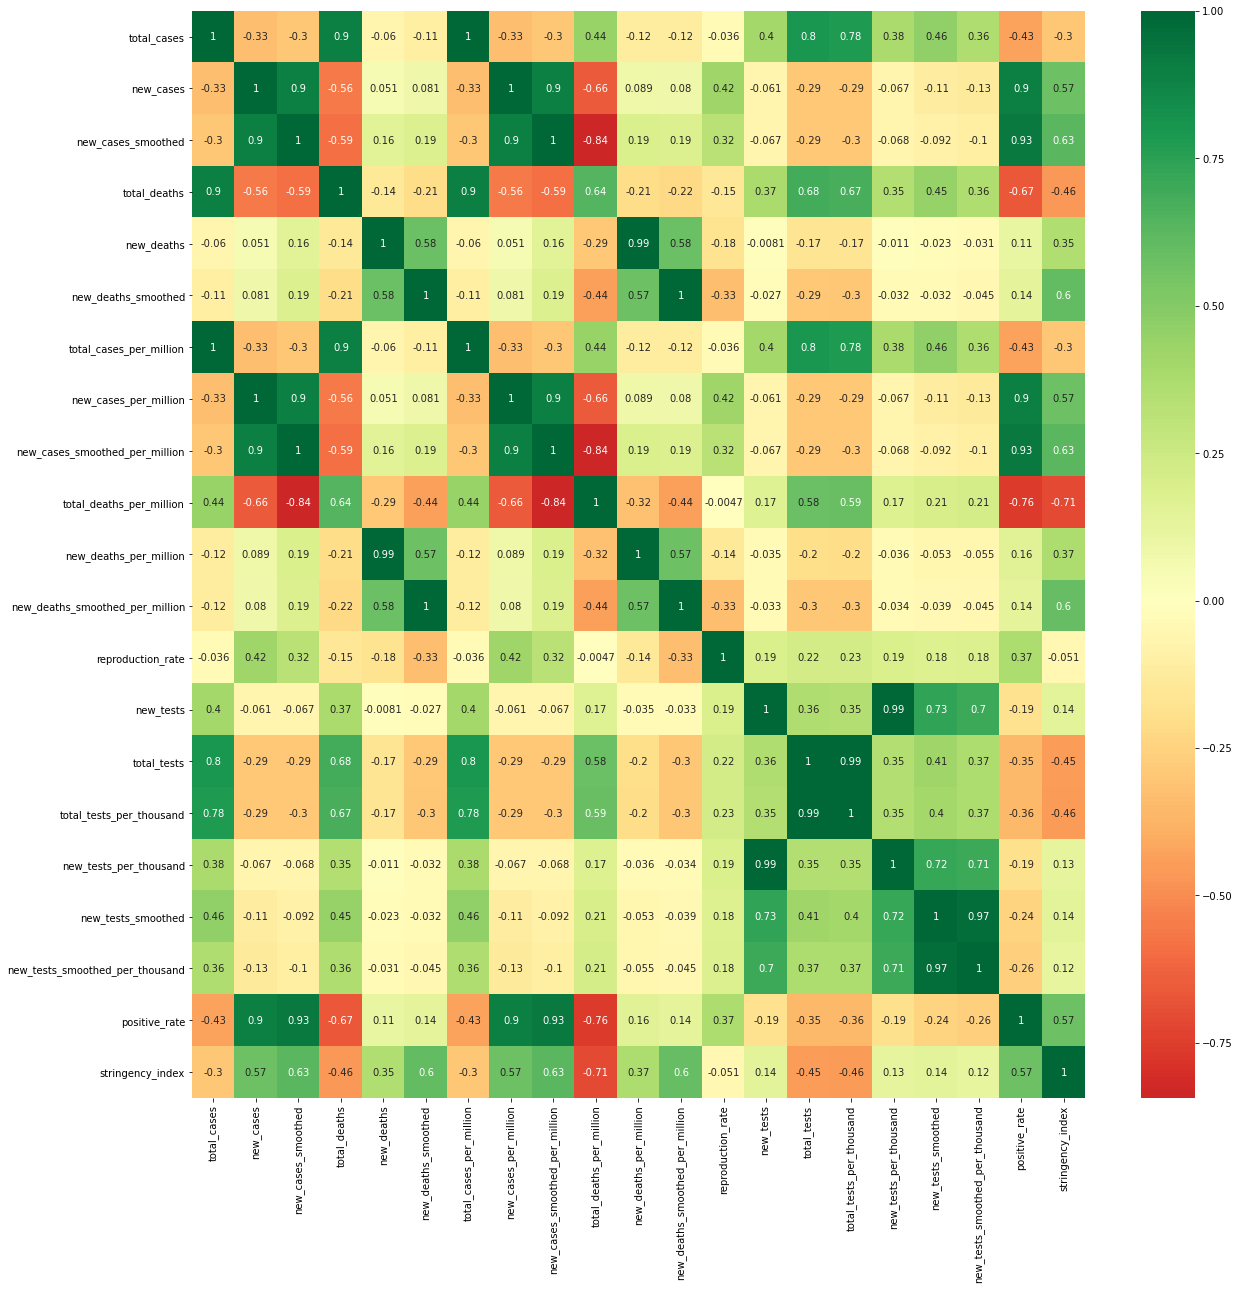

In [27]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(NZ_process_df.corr(), annot=True , ax = ax , cmap = 'RdYlGn', center=0)

# **Few insights from the Data**
Time series plots for some important varibles

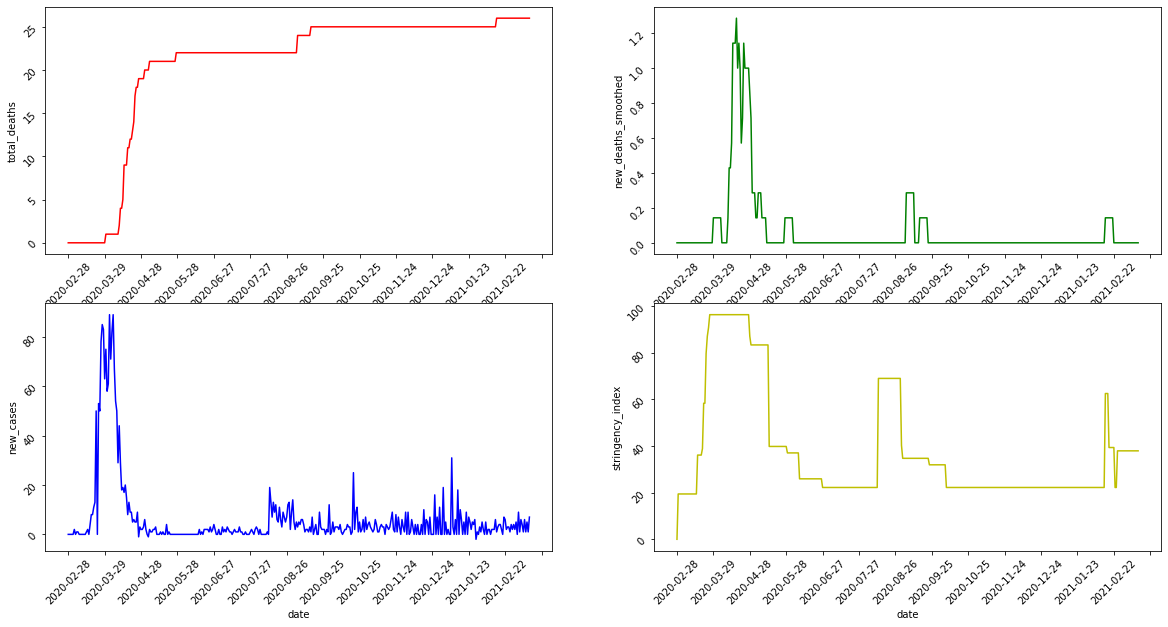

In [28]:
import matplotlib.ticker as ticker  

fig,ax =  plt.subplots( 2, 2,  figsize = ( 20, 10)) 

sns.lineplot(x="date", y="total_deaths",data=NZ_process_df,ax =ax[0][0],color = 'r')
ax[0][0].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[0][0].tick_params(labelrotation = 45) 

sns.lineplot(x="date", y="new_deaths_smoothed",data=NZ_process_df,ax =ax[0][1],color = 'g')
ax[0][1].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[0][1].tick_params(labelrotation = 45) 

sns.lineplot(x="date", y="new_cases",data=NZ_process_df,ax =ax[1][0],color = 'b')
ax[1][0].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[1][0].tick_params(labelrotation = 45) 

sns.lineplot(x="date", y="stringency_index",data=NZ_process_df,ax =ax[1][1],color = 'y')
ax[1][1].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[1][1].tick_params(labelrotation = 45) 

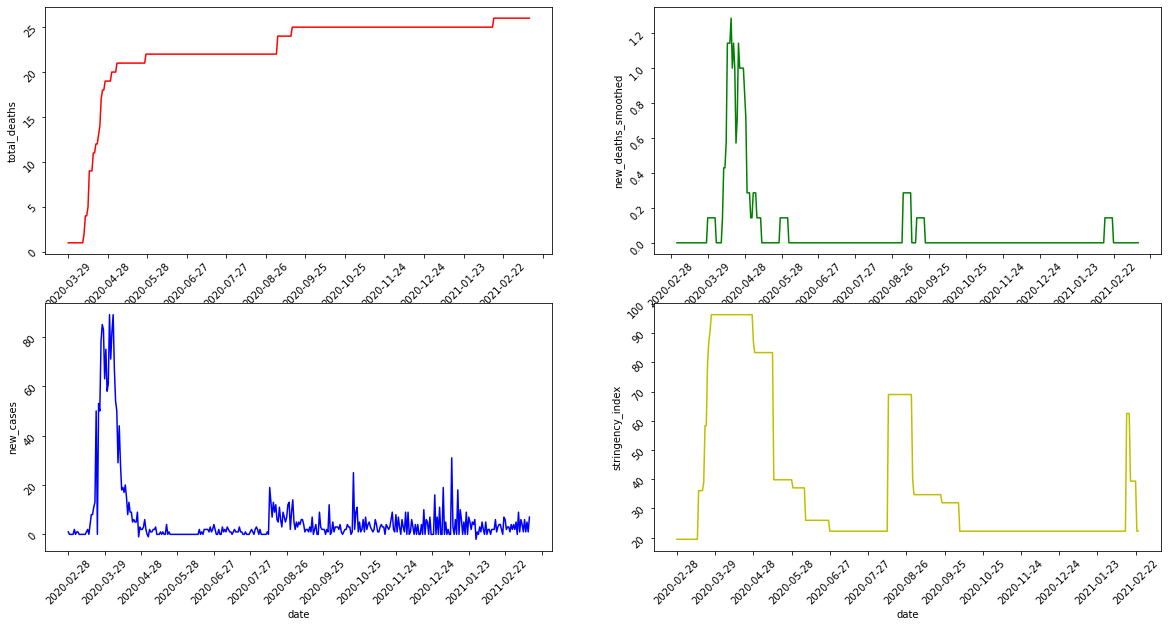

In [29]:
import matplotlib.ticker as ticker  

fig,ax =  plt.subplots( 2, 2,  figsize = ( 20, 10)) 

sns.lineplot(x="date", y="total_deaths",data=NZ_df,ax =ax[0][0],color = 'r')
ax[0][0].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[0][0].tick_params(labelrotation = 45) 

sns.lineplot(x="date", y="new_deaths_smoothed",data=NZ_df,ax =ax[0][1],color = 'g')
ax[0][1].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[0][1].tick_params(labelrotation = 45) 

sns.lineplot(x="date", y="new_cases",data=NZ_df,ax =ax[1][0],color = 'b')
ax[1][0].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[1][0].tick_params(labelrotation = 45) 

sns.lineplot(x="date", y="stringency_index",data=NZ_df,ax =ax[1][1],color = 'y')
ax[1][1].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[1][1].tick_params(labelrotation = 45) 

We observe that there were many deaths in March-April whereas the situation was nealy under control during the period of May-Jul.

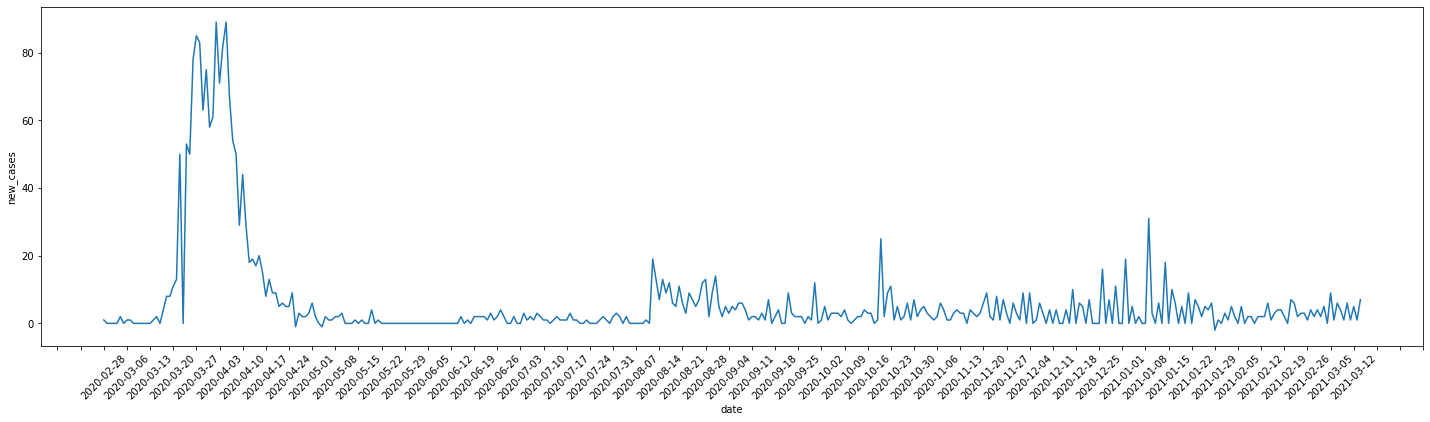

In [30]:
fig, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x="date", y="new_cases",sizes=(10, 10),data=NZ_df,ax =ax)
plt.xticks(rotation=45);
fig.tight_layout(pad = 1.2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(7)) 

Text(0, 0.5, 'Count')

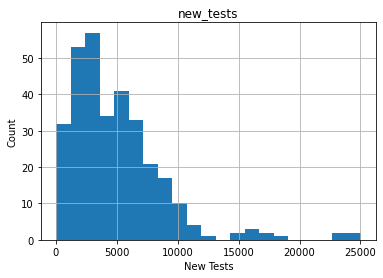

In [31]:
NZ_df.hist(column='new_tests', bins='auto')
plt.xlabel('New Tests')
plt.ylabel('Count')

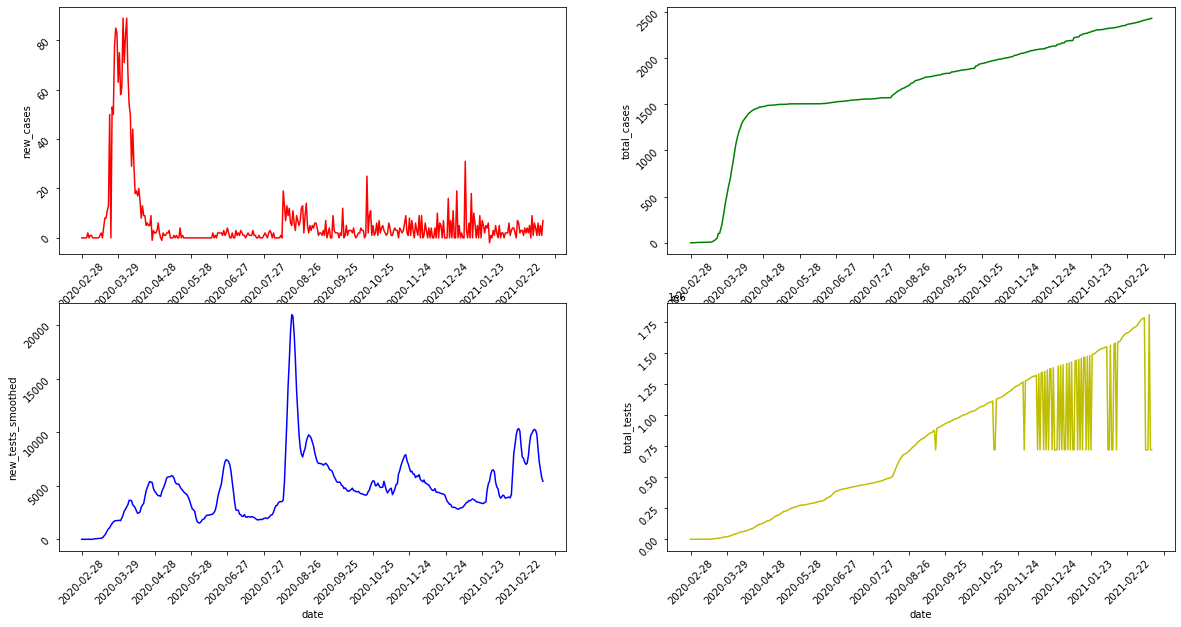

In [32]:
fig,ax =  plt.subplots( 2, 2,  figsize = ( 20, 10)) 

sns.lineplot(x="date", y="new_cases",data=NZ_process_df,ax =ax[0][0],color = 'r')
ax[0][0].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[0][0].tick_params(labelrotation = 45) 

sns.lineplot(x="date", y="total_cases",data=NZ_process_df,ax =ax[0][1],color = 'g')
ax[0][1].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[0][1].tick_params(labelrotation = 45) 

sns.lineplot(x="date", y="new_tests_smoothed",data=NZ_process_df,ax =ax[1][0],color = 'b')
ax[1][0].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[1][0].tick_params(labelrotation = 45) 

sns.lineplot(x="date", y="total_tests",data=NZ_process_df,ax =ax[1][1],color = 'y')
ax[1][1].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[1][1].tick_params(labelrotation = 45) 


We see that New Zealand has done nearly 0-5K tests per day for nearly 150 days out of 290 days.

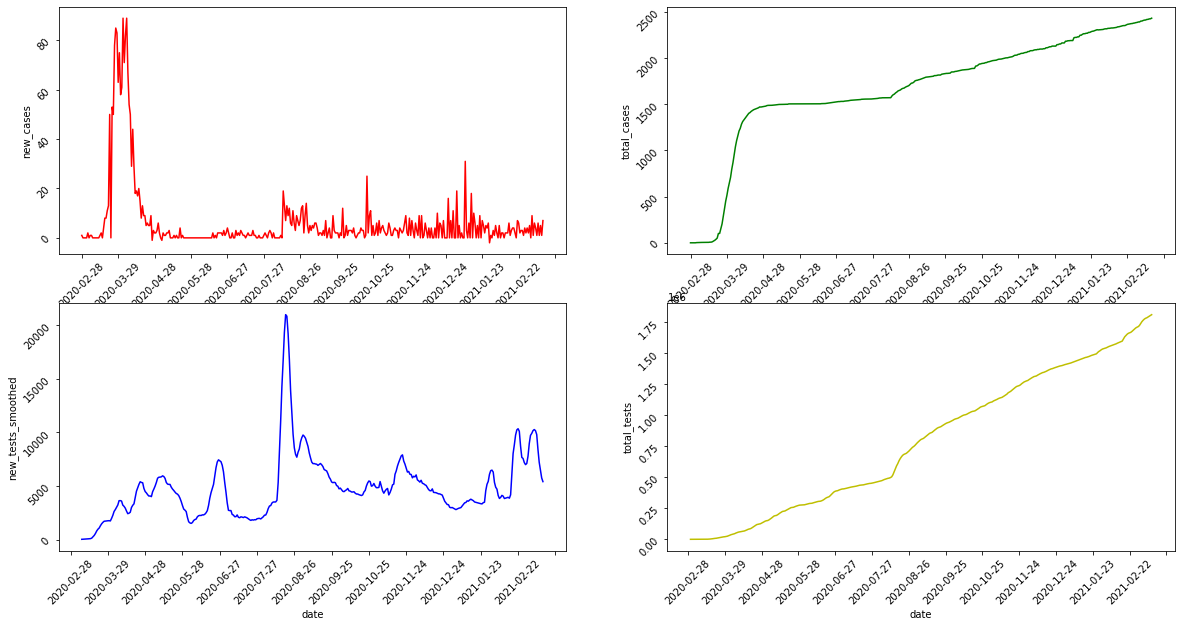

In [33]:
fig,ax =  plt.subplots( 2, 2,  figsize = ( 20, 10)) 

sns.lineplot(x="date", y="new_cases",data=NZ_df,ax =ax[0][0],color = 'r')
ax[0][0].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[0][0].tick_params(labelrotation = 45) 

sns.lineplot(x="date", y="total_cases",data=NZ_df,ax =ax[0][1],color = 'g')
ax[0][1].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[0][1].tick_params(labelrotation = 45) 

sns.lineplot(x="date", y="new_tests_smoothed",data=NZ_df,ax =ax[1][0],color = 'b')
ax[1][0].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[1][0].tick_params(labelrotation = 45) 

sns.lineplot(x="date", y="total_tests",data=NZ_df,ax =ax[1][1],color = 'y')
ax[1][1].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[1][1].tick_params(labelrotation = 45) 


# **We observe that:**

1. Corona peak hit the New Zealand in March-end

2. Corona Tests per day was maximum in Mid-August

3. Total Corona cases are nearly 1500 in New Zealand uptil Mid October

4. Total tests done are nearly 1M

# Time Period of First wave in New Zealand, Slovakia and Germany

Text(150, 6000, 'FIRST WAVE: ~100 DAYS')

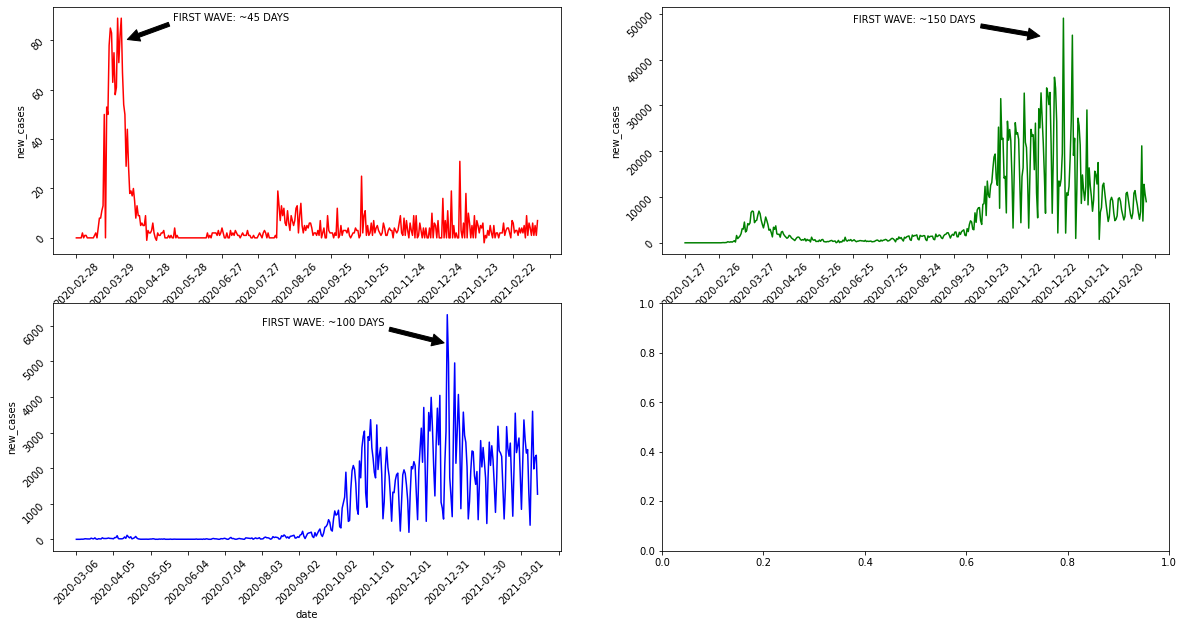

In [34]:
fig,ax =  plt.subplots( 2, 2,  figsize = ( 20, 10)) 

sns.lineplot(x="date", y="new_cases",data=NZ_process_df,ax =ax[0][0],color = 'r')
ax[0][0].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[0][0].tick_params(labelrotation = 45)
ax[0][0].annotate('FIRST WAVE: ~45 DAYS', xy=(40, 80), xytext=(80, 88),
            arrowprops=dict(facecolor='black', shrink=0.05))

sns.lineplot(x="date", y="new_cases",data=Ger_process_df,ax =ax[0][1],color = 'g')
ax[0][1].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[0][1].tick_params(labelrotation = 45)
ax[0][1].annotate('FIRST WAVE: ~150 DAYS', xy=(320, 45000), xytext=(150, 48000),
            arrowprops=dict(facecolor='black', shrink=0.05))

sns.lineplot(x="date", y="new_cases",data=Slv_process_df,ax =ax[1][0],color = 'b')
ax[1][0].xaxis.set_major_locator(ticker.MultipleLocator(30)) 
ax[1][0].tick_params(labelrotation = 45)
ax[1][0].annotate('FIRST WAVE: ~100 DAYS', xy=(300, 5500), xytext=(150, 6000),
            arrowprops=dict(facecolor='black', shrink=0.05))

# **IMPORTANT variables:**

* new_tests_smoothed

* new_cases_smoothed

* new_deaths_smoothed

In [35]:
fig = go.Figure(data=[go.Bar(name='Corona Positive', x=NZ_process_df['date'], y=NZ_process_df['new_cases_smoothed'],marker_color='#2fcc41'),
                      go.Bar(name='Deaths', x=NZ_process_df['date'], y=NZ_process_df['new_deaths_smoothed'],marker_color='#FF0000')] )

fig.update_layout(barmode='stack',width=1000, height=600)
fig.update_traces(textposition='inside')
fig.update_layout(title_text='Number of people tested and positive among them',plot_bgcolor='rgb(255,255,255)')
fig.show()

# Part-II  Model Development

- ## Methodology Used:
- First we tried implementing Agent based Model for predicing the New Cases in New Zealand, but due to insufficient data about the pandemic, time constraints and lack of resources for Implementation of Agent Based Modelling we shifted our focus on Implementing Multivariate Linear Regression.
- We divided the dataset into two parts
    >>- Nearly 10 months for Model Development
    >> - Last 2 months for Predicting the impact of coronavirus and the number of new cases per day.
- Further Model Evaluation was done by using 
    >> - R2 score,MSE, MAE
    >> - Distribution plot of Actual vs Predicted cases 
    >> - Comparison of Predicted new cases vs Actual New Cases for Last 2 months.

In [36]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [37]:
NZ_process_df_model = NZ_process_df.iloc[0:320]
NZ_process_df_predict = NZ_process_df.iloc[320:]

Ger_process_df_model = Ger_process_df.iloc[0:320]
Ger_process_df_predict = Ger_process_df.iloc[320:]

Slv_process_df_model = Slv_process_df.iloc[0:310]
Slv_process_df_predict = Slv_process_df.iloc[310:]


## Feature Selection & Data splitting for First 8 months 

### Feature Selection for New Zealand

In [38]:
y_data_NZ = NZ_process_df_model['new_cases_smoothed']      #new cases
x_data_NZ = NZ_process_df_model[['total_cases','total_deaths', 'new_deaths', 'new_deaths_smoothed'
  ,'new_tests', 'total_tests', 'new_tests_smoothed' , 'positive_rate', 'stringency_index']]

x_train_NZ, x_test_NZ, y_train_NZ, y_test_NZ = train_test_split(x_data_NZ, y_data_NZ, test_size=0.22, random_state=0)

print("number of test samples :", x_test_NZ.shape[0])
print("number of training samples:",x_train_NZ.shape[0])
#x_data.head(5)


number of test samples : 71
number of training samples: 249


The features used for model implementation were chosen after taking correlation statistics into consideration.

### Feature Selection for Germany

In [39]:
y_data_ger = Ger_process_df_model['new_cases_smoothed']      #new cases
x_data_ger = Ger_process_df_model[['total_cases','total_deaths', 'new_deaths', 'new_deaths_smoothed'
  , 'total_tests', 'new_tests_smoothed' , 'positive_rate', 'stringency_index']]

x_train_ger, x_test_ger, y_train_ger, y_test_ger = train_test_split(x_data_ger, y_data_ger, test_size=0.2, random_state=0)

print("number of test samples :", x_test_ger.shape[0])
print("number of training samples:",x_train_ger.shape[0])
x_data_ger.head(5)

number of test samples : 64
number of training samples: 256


,total_cases,total_deaths,new_deaths,new_deaths_smoothed,total_tests,new_tests_smoothed,positive_rate,stringency_index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.56
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.56
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.56
4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.56


### Feature Selection for Slovakia

In [40]:
y_data_slv = Slv_process_df_model['new_cases_smoothed']      #new cases
x_data_slv = Slv_process_df_model[['total_cases','total_deaths', 'new_deaths', 'new_deaths_smoothed'
  , 'total_tests', 'new_tests_smoothed' , 'positive_rate', 'stringency_index']]

x_train_slv, x_test_slv, y_train_slv, y_test_slv = train_test_split(x_data_slv, y_data_slv, test_size=0.2, random_state=0)

print("number of test samples :", x_test_slv.shape[0])
print("number of training samples:",x_train_slv.shape[0])
x_data_slv.head(5)

number of test samples : 62
number of training samples: 248


,total_cases,total_deaths,new_deaths,new_deaths_smoothed,total_tests,new_tests_smoothed,positive_rate,stringency_index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,1.0,0.0,0.0,0.0,444.0,0.0,0.0,16.67
2,3.0,0.0,0.0,0.0,520.0,0.0,0.0,16.67
3,3.0,0.0,0.0,0.0,589.0,0.0,0.0,22.22
4,7.0,0.0,0.0,0.0,700.0,0.0,0.0,33.33


## Model Training 

     


In [41]:
lm_NZ = LinearRegression()
lm_NZ.fit(x_train_NZ, y_train_NZ)
Y_hat_NZ=lm_NZ.predict(x_test_NZ)

In [42]:
lm_ger = LinearRegression()
lm_ger.fit(x_train_ger, y_train_ger)
Y_hat_ger=lm_ger.predict(x_test_ger)

In [43]:

lm_slv = LinearRegression()
lm_slv.fit(x_train_slv, y_train_slv)
Y_hat_slv=lm_slv.predict(x_test_slv)

## Model Evaluation

- ### R2 Score for Model Evaluation

In [44]:
print ('Coefficients: ', lm_NZ.coef_)
print ('Intercept: ' , lm_NZ.intercept_)
print("\nR2 Score for New Zealand model")
print('Train score :',lm_NZ.score(x_train_NZ, y_train_NZ))
print('Test score :', lm_NZ.score(x_test_NZ, y_test_NZ) )

Coefficients:  [ 2.58004952e-02 -1.70399754e+00  1.39853587e-01 -9.08878572e+00
 -7.19619625e-05 -6.70004160e-06  6.01278801e-04  1.48104102e+03
  3.99882232e-02]
Intercept:  -2.775636528410085

R2 Score for New Zealand model
Train score : 0.9473943540129925
Test score : 0.8978477725346187


In [45]:
print ('Coefficients: ', lm_ger.coef_)
print ('Intercept: ' , lm_ger.intercept_)
print("\nR2 Score for Germany model")
print('Train score :',lm_ger.score(x_train_ger, y_train_ger))
print('Test score :', lm_ger.score(x_test_ger, y_test_ger) )

Coefficients:  [ 3.30464295e-02 -1.18519166e+00  4.47112949e-01 -8.81958167e+00
 -3.39830811e-05  1.68549389e-02  3.24148870e+03  5.98586496e+01]
Intercept:  -284.9878804506852

R2 Score for Germany model
Train score : 0.9436109358242645
Test score : 0.9168740154251487


In [46]:

print ('Coefficients: ', lm_slv.coef_)
print ('Intercept: ' , lm_slv.intercept_)
print("\nR2 Score for Slovakia model")
print('Train score :',lm_slv.score(x_train_slv, y_train_slv))
print('Test score :', lm_slv.score(x_test_slv, y_test_slv) )

Coefficients:  [ 2.17141022e-02 -6.22597865e-01 -1.04219673e+00  2.45654768e+01
 -1.42817777e-03  4.20371246e-02  6.86222549e+03 -7.70757240e+00]
Intercept:  484.940187898905

R2 Score for Slovakia model
Train score : 0.9625354259529175
Test score : 0.9575397259155185


- ### Distribution Plot for Model Evaluation

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



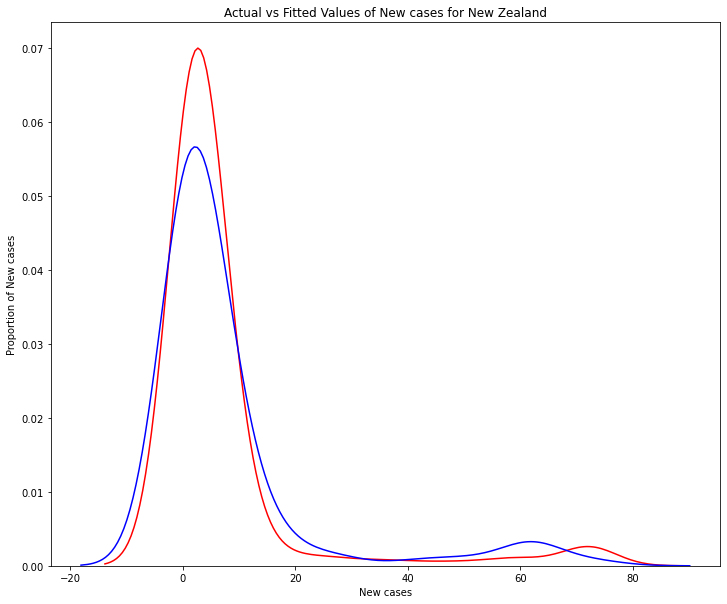

In [47]:
width = 12
height = 10
plt.figure(figsize=(width, height))

Y_hat_NZ=lm_NZ.predict(x_train_NZ)
ax1 = sns.distplot(y_data_NZ, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat_NZ, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values of New cases for New Zealand')
plt.xlabel('New cases')
plt.ylabel('Proportion of New cases')

plt.show()
plt.close()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



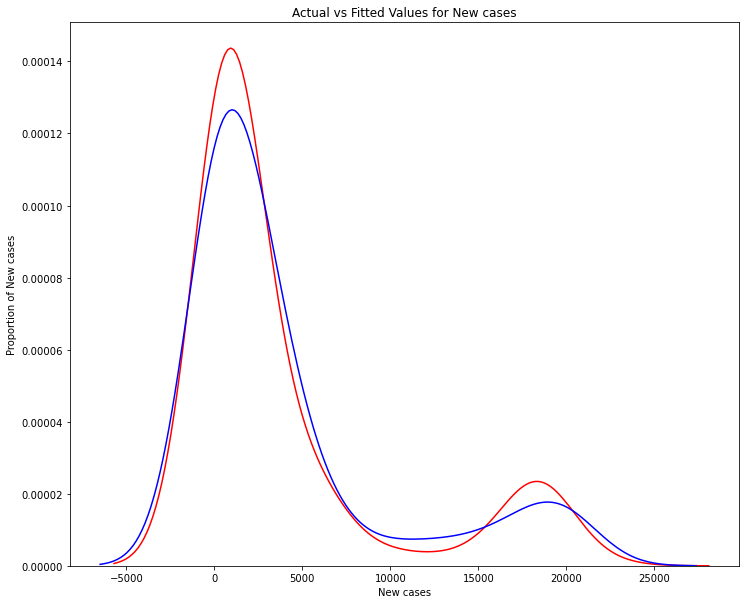

In [48]:
width = 12
height = 10
plt.figure(figsize=(width, height))

Y_hat_ger=lm_ger.predict(x_train_ger)
ax1 = sns.distplot(y_data_ger, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat_ger, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for New cases')
plt.xlabel('New cases')
plt.ylabel('Proportion of New cases')

plt.show()
plt.close()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



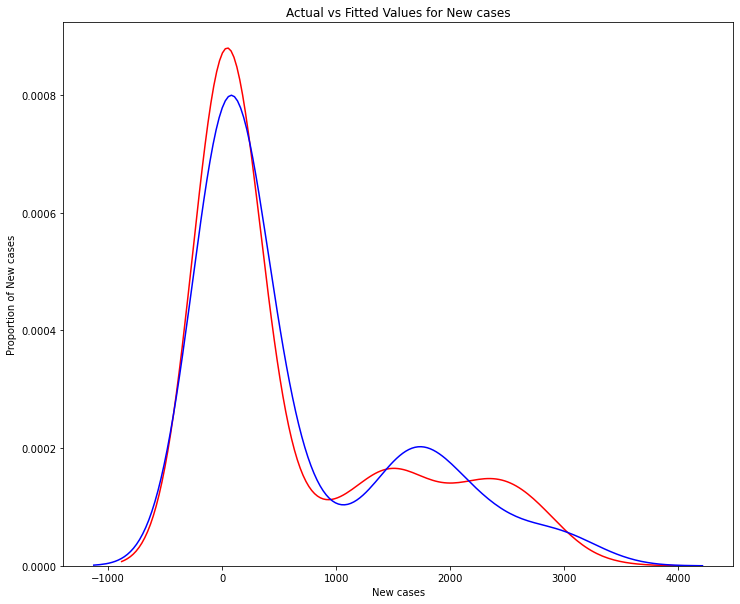

In [49]:
width = 12
height = 10
plt.figure(figsize=(width, height))

Y_hat_slv=lm_slv.predict(x_train_slv)
ax1 = sns.distplot(y_data_slv, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat_slv, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for New cases')
plt.xlabel('New cases')
plt.ylabel('Proportion of New cases')

plt.show()
plt.close()

## Predicting New cases in New Zealand For Next 2 Months

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



<AxesSubplot:xlabel='new_cases_smoothed', ylabel='Density'>

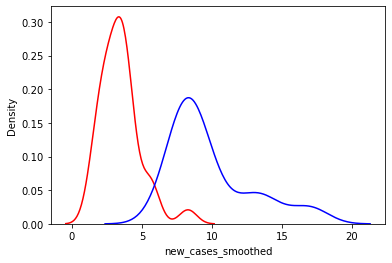

In [50]:
#Prediction NZ for next 2 months
y_data_predict_NZ = NZ_process_df_predict['new_cases_smoothed']      
x_data_predict_NZ = NZ_process_df_predict[['total_cases','total_deaths', 'new_deaths', 'new_deaths_smoothed'
  ,'new_tests', 'total_tests', 'new_tests_smoothed' , 'positive_rate', 'stringency_index']]

Y_hat_predict_NZ=lm_NZ.predict(x_data_predict_NZ)
ax1 = sns.distplot(y_data_predict_NZ, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat_predict_NZ, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [51]:
def customLegend(fig, nameSwap):
    for i, dat in enumerate(fig.data):
        for elem in dat:
            if elem == 'name':
                fig.data[i].name = nameSwap[fig.data[i].name]
    return(fig)

column_list = [NZ_process_df_predict['new_cases_smoothed'], Y_hat_predict_NZ]
fig = px.line(NZ_process_df_predict, x="date", y=column_list,
              title='Actual vs Predicted New Cases for the 2nd wave for New Zealand', labels={"date": "Date", "value": "New Cases"})

fig = customLegend(fig=fig, nameSwap = {'new_cases_smoothed': 'Actual_New_Cases', 'wide_variable_1':'Predicted_New_Cases'})

fig.show()

**Interpretation:** 
* We can see from the above graph that the predicted new cases for the 2nd wave in New Zealand starting from 13 Jan 2021 to 14 March 2021 are a close estimate to the Actual new cases.
* As New Zealand does not have a significant 2nd wave as compared to other countries, the predicted values are slightly deviated from the actual results.

## Predicting New cases in Germany For Next 2 Months

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



<AxesSubplot:xlabel='new_cases_smoothed', ylabel='Density'>

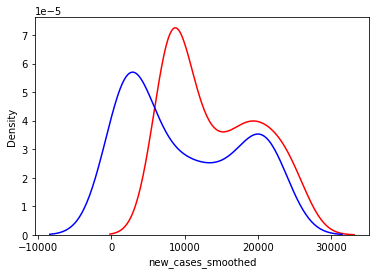

In [52]:
#Prediction Ger for next 2 months
y_data_predict_ger = Ger_process_df_predict['new_cases_smoothed']      
x_data_predict_ger = Ger_process_df_predict[['total_cases','total_deaths', 'new_deaths', 'new_deaths_smoothed'
  , 'total_tests', 'new_tests_smoothed' , 'positive_rate', 'stringency_index']]

Y_hat_predict_ger=lm_ger.predict(x_data_predict_ger)
ax1 = sns.distplot(y_data_predict_ger, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat_predict_ger, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [53]:
column_list = [Ger_process_df_predict['new_cases_smoothed'], Y_hat_predict_ger]
fig = px.line(Ger_process_df_predict, x="date", y=column_list,
              title='Actual vs Predicted for the 2nd wave for Germany', labels={"date": "Date", "value": "New Cases"})

fig = customLegend(fig=fig, nameSwap = {'new_cases_smoothed': 'Actual_New_Cases', 'wide_variable_1':'Predicted_New_Cases'})

fig.show()

**Interpretation**: 
* Thus, from the above graph we see that the predicted new cases for the 2nd wave in Germany starting from 12 Dec 2020 to 14 March 2021 are a close estimate to the Actual new cases

## Conclusion:
1.  Earlier implemention of Agent based Model for predicing the New Cases in New Zealand was tried, but due to lack of Features required for ABM implemention in currently available datasets and lack of resources for Implementation of Agent Based Modelling we shifted our focus on Implementing Multivariate Linear Regression.
2. A detailed Exploratory Data Analysis was performed on the New Zealand Covid-19 data and prediction of new cases during 2nd wave was done by using Multi-Variate Linear Regression Model.
3. Further the model was evaluated using different evaluation metrices and was tested for different countries as well.(such as Germany, Slovakia) 
4. Then the Prediction of new covid 19 cases in New Zealand & Germany during 2nd wave(i.e Last 2 months of our dataset) was done.